In [ ]:
#generic import and constant definition list
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py
import astropy.constants as cons
from matplotlib.colors import LogNorm
import astropy.units as u
import pandas as pd
import scipy.optimize as opt
#all of the important fundamental constants are put into cgs units just for convenience
c=cons.c.cgs.value
G=cons.G.cgs.value
h=cons.h.cgs.value
hbar=cons.hbar.cgs.value
Msun=cons.M_sun.cgs.value
Rsun=cons.R_sun.cgs.value
Rearth=cons.R_earth.cgs.value
mp=cons.m_p.cgs.value
me=cons.m_e.cgs.value
mn=cons.m_n.cgs.value
kB=cons.k_B.cgs.value
mu_e=2 #mean mass per electron for He-core or C/O core composition
m_u = 1/cons.N_A.cgs.value #atomic mass unit in grams
from astropy.io import fits

part b.) 

In [10]:
mn

1.67492749804e-24

In [2]:
def eos1(rho):
    x = hbar*(3*np.pi**2*rho/mn)**(1/3)/ (mn*c)
    n_n = (x**3)/(3*(np.pi**2)*(hbar/(mn*c))**3) 
    phi = (1/(8*np.pi**2))*(x*np.sqrt(1+x**2)*(2*(x**2)/3 -1)+np.log(x+np.sqrt(1+x**2)))
    P = (mn*(c**2)/(hbar/(mn*c))**3)*phi
    return P

In [11]:
def eos2(rho):
    #n is in cm^-3
    return 5.83e35*((rho*1e-39/mn)**(2.54))

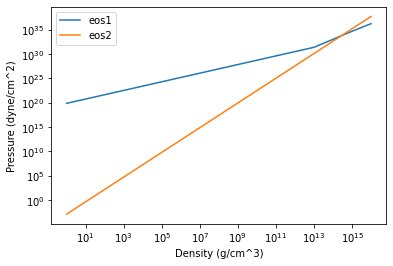

In [ ]:
rho = np.linspace(1e0,1e16,1000)
P1 = eos1(rho)
P2 = eos2(rho)
plt.plot(rho,P1,label='eos1')
plt.plot(rho,P2,label='eos2')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Density (g/cm^3)')
plt.ylabel('Pressure (dyne/cm^2)')
plt.legend()
plt.show()

c.)

In [43]:
def eos1_zero(rho,Pin):
    x = hbar*(3*np.pi**2*rho/mn)**(1/3)/ (mn*c)
    n_n = (x**3)/(3*(np.pi**2)*(hbar/(mn*c))**3) 
    phi = (1/(8*np.pi**2))*(x*np.sqrt(1+x**2)*(2*(x**2)/3 -1)+np.log(x+np.sqrt(1+x**2)))
    P = (mn*(c**2)/(hbar/(mn*c))**3)*phi
    return P - Pin

In [66]:
def eos2_zero(rho,Pin):
    #n is in cm^-3
    return 5.83e35*((rho*1e-39/mn)**(2.54)) - Pin

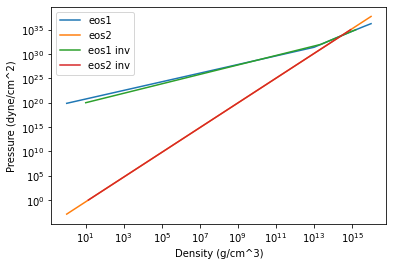

In [70]:
rho = np.linspace(1e0,1e16,1000)
P1 = eos1(rho)
P2 = eos2(rho)
plt.plot(rho,P1,label='eos1')
plt.plot(rho,P2,label='eos2')

P = np.linspace(1e20,1e35,1000)
#I got this guess just by eyeballing the plot and then messing around with it to get a linear approximation
guessRho = (P-1e10)/1e19
rho1 = opt.fsolve(eos1_zero,guessRho,args= (P))
plt.plot(rho1,P,label='eos1 inv')

P = np.linspace(1e0,1e35,1000)
guessRho2 = ((P/5.83e35)**(1/2.54))*mn*1e39
plt.plot(guessRho2,P,label='eos2 inv')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Density (g/cm^3)')
plt.ylabel('Pressure (dyne/cm^2)')
plt.legend()
plt.show()

d.)

In [ ]:
def dydr(m,P,phi,r,EOS):
    if EOS == 1:
        #put something here
        rh0 = 1e10
    elif EOS == 2:
        #5.83e35*((rho*1e-39/mn)**(2.54))
        rho = 10
    
    return np.array([dmdr,dPdr])